In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score, confusion_matrix

In [68]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [70]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
df['fraud'].value_counts(normalize= True) * 100

fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64

Text(0, 0.5, 'Proporção (%)')

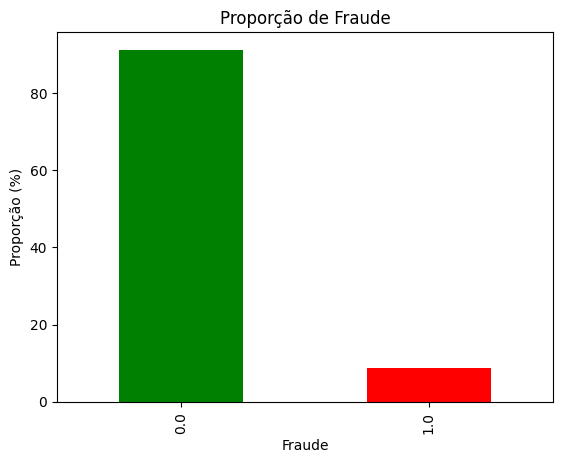

In [72]:
(df['fraud'].value_counts(normalize=True)*100).plot(kind='bar', color=['green', 'red'])

plt.title('Proporção de Fraude')
plt.xlabel('Fraude')
plt.ylabel('Proporção (%)')

<Axes: xlabel='distance_from_last_transaction', ylabel='Count'>

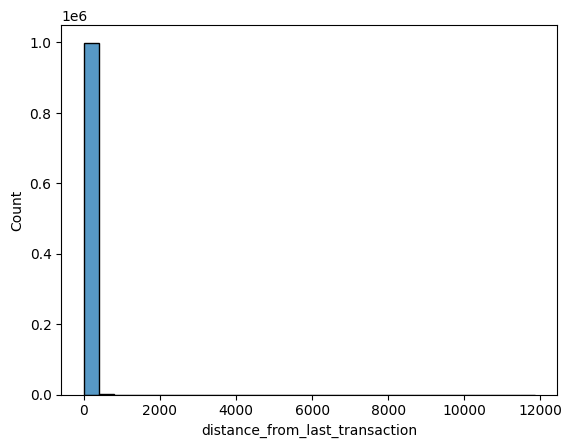

In [73]:
sns.histplot(df['distance_from_last_transaction'], bins = 30)

<Axes: xlabel='ratio_to_median_purchase_price', ylabel='Count'>

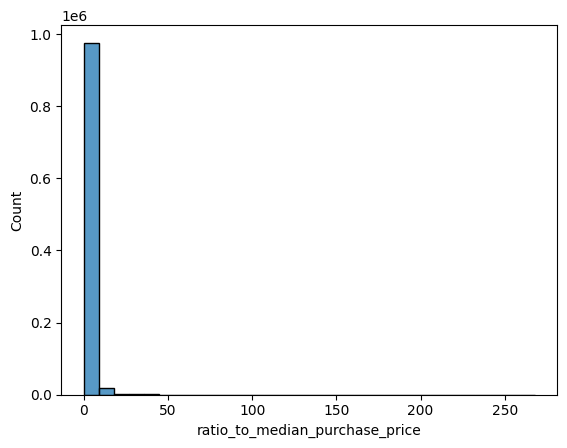

In [74]:
sns.histplot(df['ratio_to_median_purchase_price'], bins = 30)

<Axes: xlabel='ratio_to_median_purchase_price', ylabel='Count'>

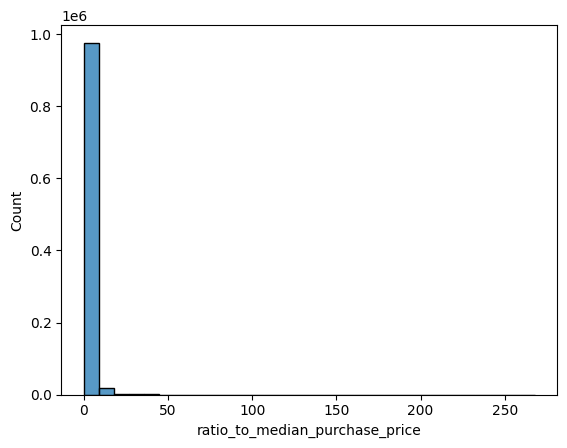

In [75]:
sns.histplot(df['ratio_to_median_purchase_price'], bins = 30)

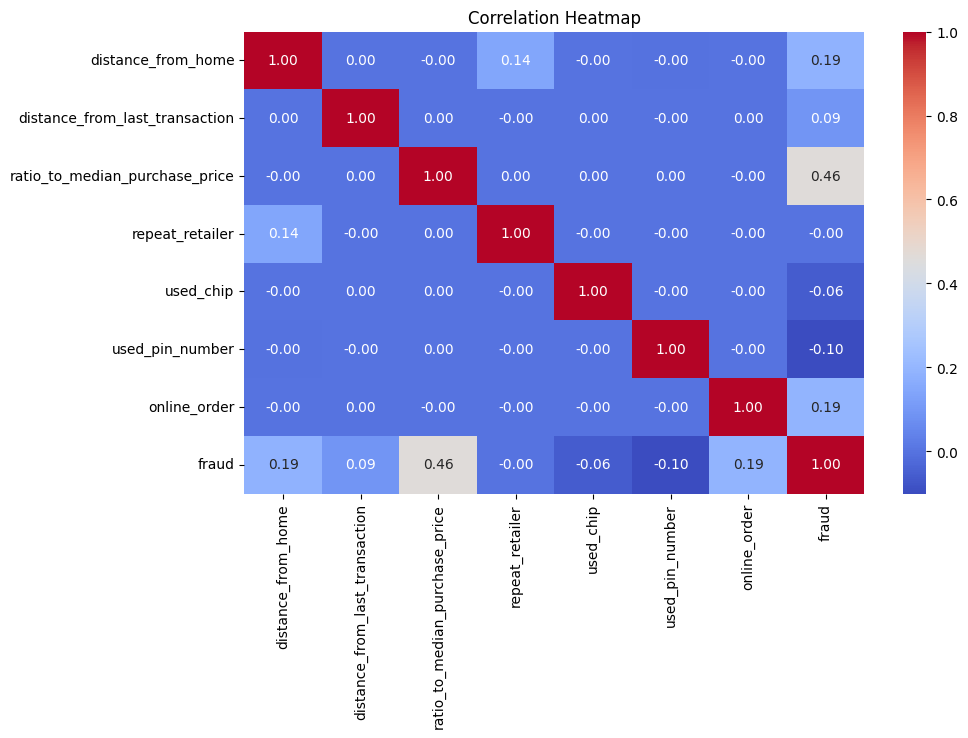

In [76]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [77]:
X = df.drop(columns = 'fraud')
y = df['fraud']


In [78]:
s_scaler = StandardScaler()


In [79]:

X[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']] = r_scaler.fit_transform(X[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])

In [80]:
sm = SMOTE(random_state = 7)

X_bal, y_bal = sm.fit_resample(X, y)

In [81]:
y_bal.value_counts(normalize = True)

fraud
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.2, random_state = 7)

In [83]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
modelo.score(X_train, y_train)

1.0

In [85]:
predict = modelo.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    183015
         1.0       1.00      1.00      1.00    182024

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039



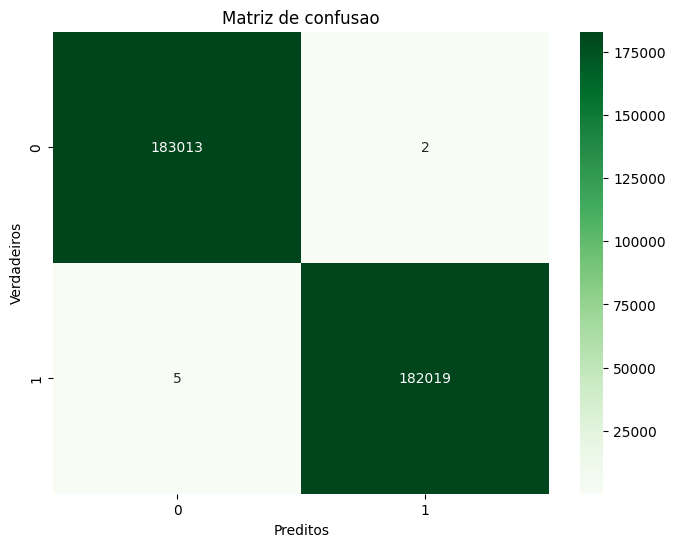

In [86]:
conf_matrix = confusion_matrix(y_test, predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Preditos')
plt.ylabel('Verdadeiros')
plt.title('Matriz de confusao')
plt.show()

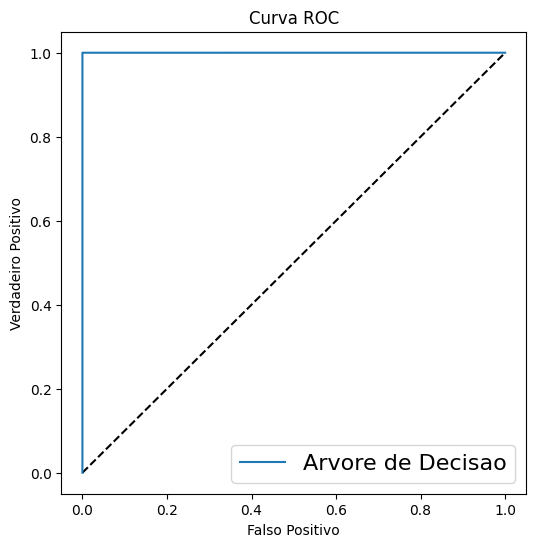

area sob a curva:  0.9999808015143976


In [88]:
y_score = modelo.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])

fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "Arvore de Decisao")
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right", fontsize=16)
plt.show()
print('area sob a curva: ', auc(fpr, tpr))
